Importando librerias necesarias:

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier  
from sklearn.metrics import classification_report, mean_squared_error, r2_score, accuracy_score,confusion_matrix


cargar los datos (del data set):

In [5]:
data = pd.read_csv('heart_cleveland_upload.csv')

In [7]:
##lo que hago aqui es mostrar las primeras 5 filas para comprobar que el data set se importo con exactitud

In [9]:
print(data.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   69    1   0       160   234    1        2      131      0      0.1      1   
1   69    0   0       140   239    0        0      151      0      1.8      0   
2   66    0   0       150   226    0        0      114      0      2.6      2   
3   65    1   0       138   282    1        2      174      0      1.4      1   
4   64    1   0       110   211    0        2      144      1      1.8      1   

   ca  thal  condition  
0   1     0          0  
1   2     0          0  
2   0     0          0  
3   1     0          1  
4   0     0          0  


In [11]:
##antes de hacer el preprocesamiento buscamos en nombre de la columna target para poder analizar los datos

In [13]:
print(data.columns)


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'condition'],
      dtype='object')


In [21]:
##antes de comenzar a realizar los diseños realizamos el preprocesamiento limpiando los datos, eliminando duplicados etc EN ESTE CASO USAMOS COMO COLUMNA TARGET (selling_price)

In [23]:
data.ffill(inplace=True)  # Imputación hacia adelante

# Ajusta según el nombre de tu columna objetivo
target_column = 'condition'

# Codificación de variables categóricas
data = pd.get_dummies(data, drop_first=True)  # Esto convierte variables categóricas en variables dummy

X = data.drop(target_column, axis=1)
y = data[target_column]


# Dividir en Train y Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [25]:
##Lo que se hace en el siguiente bloque es diseñar el modelo de regresion lineal y su aplicación:

In [31]:


###regresion_lineal = LinearRegression()
###regresion_lineal.fit(X_train, y_train)


###y_pred_lineal = regresion_lineal.predict(X_test)
###mse = mean_squared_error(y_test, y_pred_lineal)
###r2 = r2_score(y_test, y_pred_lineal)

###print("Regresión Lineal:")
###print(f"Error cuadrático medio: {mse}")
###print(f"R^2: {r2}")

In [91]:
##ahora procedemos con el diseño de regresion logistica pero antes debemos convertir la variable selling price en una variable categorica

In [33]:

data.ffill(inplace=True)


X = data.drop(['condition'], axis=1)  
y_class = data['condition']             


y_reg = data['age']  


X = pd.get_dummies(X, drop_first=True)


X_train, X_test, y_train_class, y_test_class = train_test_split(X, y_class, test_size=0.2, random_state=42)
_, _, y_train_reg, y_test_reg = train_test_split(X, y_reg, test_size=0.2, random_state=42)


linear_model = LinearRegression()
linear_model.fit(X_train, y_train_reg)
y_pred_linear = linear_model.predict(X_test)

print("Regresión Lineal:")
print(f"MSE: {mean_squared_error(y_test_reg, y_pred_linear)}")
print(f"R2 Score: {r2_score(y_test_reg, y_pred_linear)}\n")

# Regresión Logística
logistic_model = LogisticRegression(max_iter=7000)
logistic_model.fit(X_train, y_train_class)
y_pred_logistic = logistic_model.predict(X_test)

print("Regresión Logística:")
print(f"Precisión: {accuracy_score(y_test_class, y_pred_logistic)}")
print(f"Reporte de clasificación:\n{classification_report(y_test_class, y_pred_logistic)}\n")

# Árbol de Decisión
tree_model = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_model.fit(X_train, y_train_class)
y_pred_tree = tree_model.predict(X_test)

print("Árbol de Decisión:")
print(f"Precisión: {accuracy_score(y_test_class, y_pred_tree)}")
print(f"Reporte de clasificación:\n{classification_report(y_test_class, y_pred_tree)}")

Regresión Lineal:
MSE: 4.0389678347315807e-29
R2 Score: 1.0

Regresión Logística:
Precisión: 0.7333333333333333
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.77      0.72      0.74        32
           1       0.70      0.75      0.72        28

    accuracy                           0.73        60
   macro avg       0.73      0.73      0.73        60
weighted avg       0.74      0.73      0.73        60


Árbol de Decisión:
Precisión: 0.6666666666666666
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.69      0.69      0.69        32
           1       0.64      0.64      0.64        28

    accuracy                           0.67        60
   macro avg       0.67      0.67      0.67        60
weighted avg       0.67      0.67      0.67        60



In [35]:
#analisis exploratorio: obtenemos valores como desviacion estandar, numero de observaciones no nulas, media, valor minimo media, mediana y moda con sus cuartiles y el valor maximo

In [ ]:
print(data.describe())
sns.pairplot(data)
plt.show()

              age         sex          cp    trestbps        chol         fbs  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean    54.542088    0.676768    2.158249  131.693603  247.350168    0.144781   
std      9.049736    0.468500    0.964859   17.762806   51.997583    0.352474   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    2.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    2.000000  130.000000  243.000000    0.000000   
75%     61.000000    1.000000    3.000000  140.000000  276.000000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean     0.996633  149.599327    0.326599    1.055556    0.602694    0.676768   
std      0.994914   22.9415

In [ ]:
# Se elige un modelo de RandomForestClassifier, que es un algoritmo de aprendizaje automático basado en árboles de decisión. y entrenamos el modelo 


In [ ]:
model = RandomForestClassifier(n_estimators=10)
model.fit(X_train, y_train)


In [97]:
#proporciona métricas como precisión, recall y F1-score. Estas métricas ayudan a evaluar cómo de bien está funcionando el modelo.

In [99]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

       20000       0.00      0.00      0.00         1
       30000       0.00      0.00      0.00         0
       35000       0.00      0.00      0.00         1
       40000       0.00      0.00      0.00         1
       43000       0.00      0.00      0.00         1
       45000       0.14      1.00      0.25         1
       50000       0.00      0.00      0.00         1
       51111       0.00      0.00      0.00         1
       55000       0.00      0.00      0.00         1
       57000       0.00      0.00      0.00         1
       58000       0.00      0.00      0.00         1
       60000       0.50      0.20      0.29         5
       65000       0.50      0.25      0.33         4
       68000       0.33      1.00      0.50         1
       69000       1.00      1.00      1.00         1
       70000       0.00      0.00      0.00         4
       72000       0.00      0.00      0.00         0
       73000       0.00    

C:\Users\Kevin Pinto\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Kevin Pinto\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Kevin Pinto\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Kevin Pinto\anaconda3

In [ ]:
#Se crea una matriz de confusión que muestra el rendimiento del modelo en términos de verdaderos positivos, verdaderos negativos, falsos positivos y falsos negativos.

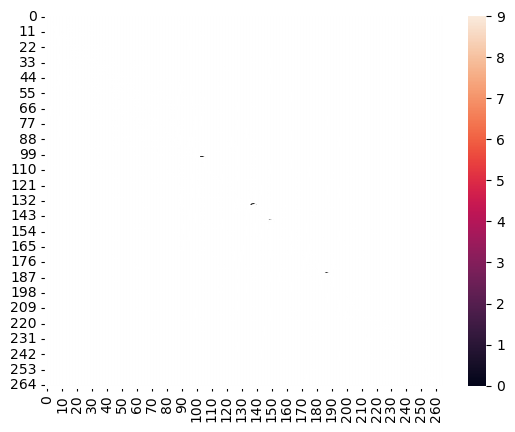

In [101]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.show()
